# Heart Desease Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## About the data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Attribute Information:

 - age
 - sex
 - chest pain type (4 values)
 - resting blood pressure
 - serum cholestoral in mg/dl
 - fasting blood sugar > 120 mg/dl
 - resting electrocardiographic results (values 0,1,2)
 - maximum heart rate achieved
 - exercise induced angina
 - oldpeak = ST depression induced by exercise relative to rest
 - the slope of the peak exercise ST segment
 - number of major vessels (0-3) colored by flourosopy
 - thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
 - target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators: Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].unique()

array([1, 0])

## Exploratory Data Analysis and Visualization

**Is there any missing feature?**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Statistical summary of the numerical features**

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**How balanced is the dataset?**

In [7]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5, 1.0, 'Total counts per target value')

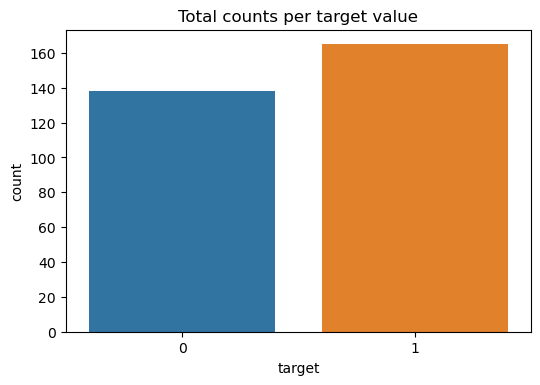

In [8]:
plt.figure(dpi=100)
sns.countplot(data=df, x='target')
plt.title('Total counts per target value')

The dataset is balanced. There is 138 patients with no presence of heart disease and 168 with presence of heart desease.

**Relationships between age, resting blood pressure (trestbps), serum cholestoral in mg/dl (chol), maximum heart rate achieved (thalach) and target**

<Figure size 600x400 with 0 Axes>

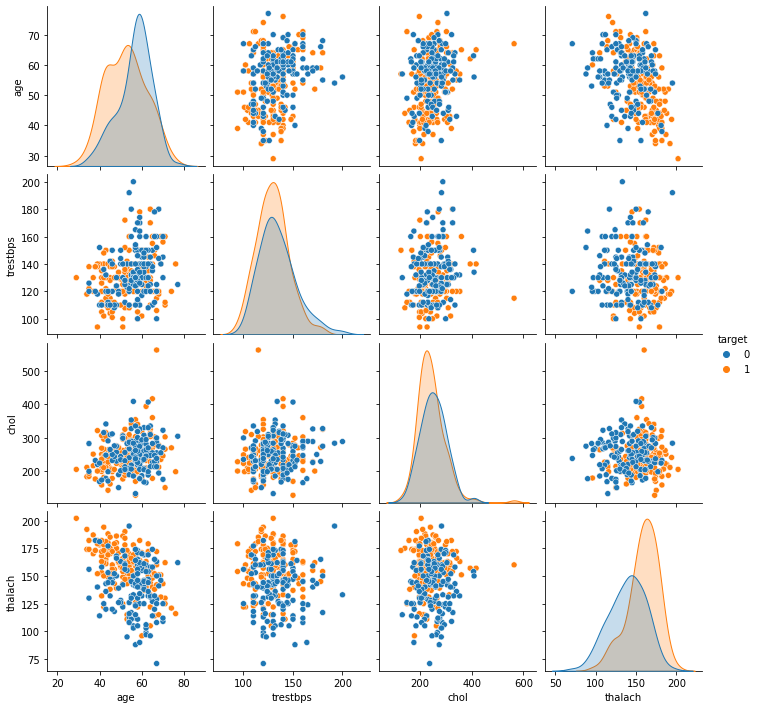

In [9]:
plt.figure(dpi=100)
sns.pairplot(data=df, hue='target', vars=['age', 'trestbps', 'chol', 'thalach'])

**What is the correlation between features?**

Text(0.5, 1.0, 'Correlation between features')

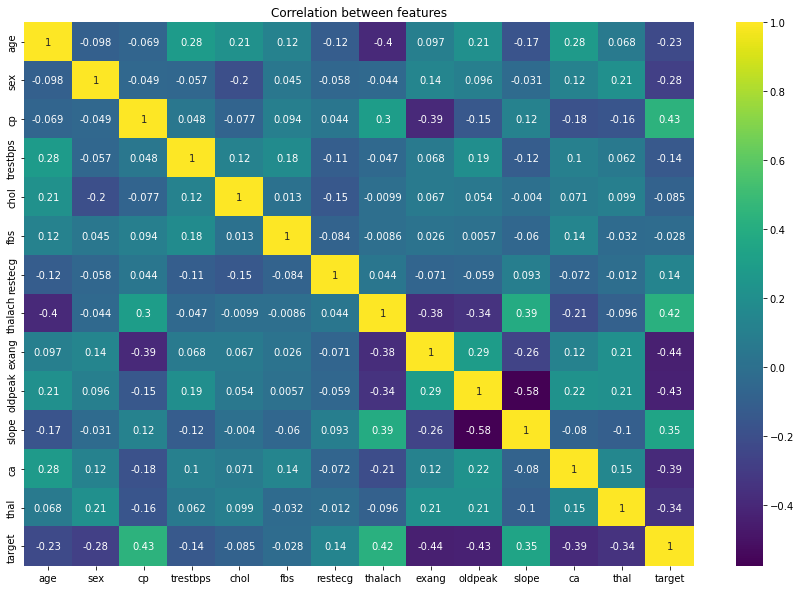

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(), annot=True, cmap='viridis')
plt.title("Correlation between features")

## Machine Learning

**Create X and y**

In [11]:
X = df.drop('target', axis=1)

In [12]:
y = df['target']

**Train | test split**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=101)

**Scaling the data**

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

**Create the model**

In [19]:
from sklearn.linear_model import LogisticRegressionCV

In [20]:
C = np.logspace(0,10,20)
l1_ratio = np.linspace(0,1,20)

In [21]:
logistic_model = LogisticRegressionCV(Cs=C, cv=10, penalty='elasticnet', 
                                      solver='saga', max_iter=5000, verbose=0,
                                      l1_ratios=l1_ratio)

**Fit the model**

In [22]:
logistic_model.fit(X_train, y_train)

LogisticRegressionCV(Cs=array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                     cv=10,
                     l1_ratios=array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                     max_iter=5000, penalty='elasticnet', solver='saga')

**Search's optimal parameters**

In [23]:
logistic_model.l1_ratio_

array([1.])

In [24]:
logistic_model.C_

array([1.])

**Coefficients**

In [25]:
logistic_model.coef_

array([[-0.04781161, -0.69648393,  0.88805165, -0.23905666, -0.18649559,
         0.00231236,  0.09606485,  0.42202414, -0.40858217, -0.52462547,
         0.35759815, -0.83233477, -0.56450696]])

## Model Performance Evaluation

Let's now evaluate our model on the remaining 10% of the data, the test set.

In [26]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, recall_score, f1_score, precision_score

In [27]:
y_predictions = logistic_model.predict(X_test)

**Confusion Matrix Array**

In [28]:
confusion_matrix(y_test, y_predictions)

array([[12,  3],
       [ 2, 14]])

**Confusion Matrix Plot**

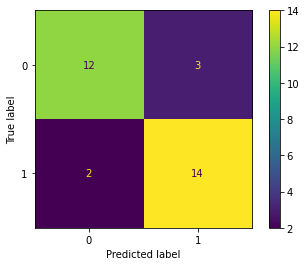

In [29]:
plot_confusion_matrix(logistic_model, X_test, y_test)

**Classification Report**

In [30]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



Our model has an accuracy of 84%.

**Precision**

In [31]:
precision_score(y_test, y_predictions)

0.8235294117647058

Our model has a precision of 82%.

**Recall**

In [32]:
recall_score(y_test, y_predictions)

0.875

Our model has a recall of 87.5%.

**F1-score**

In [33]:
f1_score(y_test, y_predictions)

0.8484848484848485

Our model has a f1-score of 84.84%

### Performance Curves

In [34]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

**Precision vs. Recall Curve**

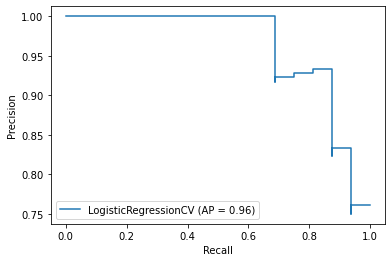

In [35]:
plot_precision_recall_curve(logistic_model, X_test, y_test)

**ROC Curve**

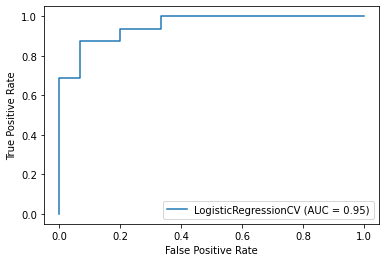

In [36]:
plot_roc_curve(logistic_model, X_test, y_test)